In [2]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

(787, 500, 3)


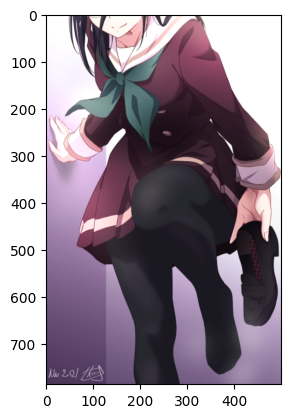

In [3]:
image = cv2.imread("../images/94147214_p0.png")
print(image.shape)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Convex Hull 凸包

什么是凸包(Convex Hull)，在一个多变形边缘或者内部任 意两个点的连线都包含在多边形边界或者内部。 检测凸多边形边界

正式定义：包含点集合S中所有点的最小凸多边形称为凸包

Graham扫描算法

首先选择Y方向最低的点作为起始点p0

从p0开始极坐标扫描，依次添加p1….pn（排序顺序是根据极坐标的角度大小，逆时针方向）

对每个点pi来说，如果添加pi点到凸包中导致一个左转向（逆时针方法）则添加该点到凸包， 反之如果导致一个右转向（顺时针方向）删除该点从凸包中

## 1.先要做边缘检测,获取二值图形

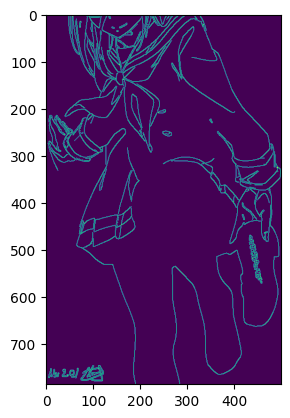

In [4]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(c)

## 2.计算轮廓

In [5]:
# 返回值为: 发现的轮廓对象, 图像的拓扑结构
contours, hierarchy = cv2.findContours(
    image=c,
    mode=cv2.RETR_TREE, # 方法
    method=cv2.CHAIN_APPROX_SIMPLE,
)

## 3.使用convexHull找凸包

In [6]:
hulls = []
for counter in contours:
    hull = cv2.convexHull(
        points=counter,
        clockwise=False,
        returnPoints=True
    )
    hulls.append(hull)
hulls[0]

array([[[ 14, 771]]], dtype=int32)

## 4.绘制凸包

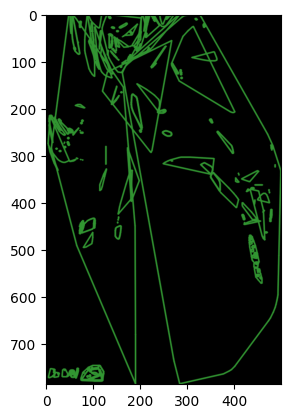

In [11]:
black = np.zeros(image.shape, dtype=np.uint8)
for i in range(len(contours)):
    cv2.drawContours(
        image=black,
        contours=hulls,  # 可以化hull
        contourIdx=i,    # counter id,可以设置为 -1
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

    cv2.drawContours(
        image=image,
        contours=hulls,  # 可以化hull
        contourIdx=i,    # counter id
        color=(50, 150, 50),
        thickness=2,
        lineType=cv2.LINE_AA,
        hierarchy=hierarchy,# 图像的拓扑结构
    )

plt.imshow(black)

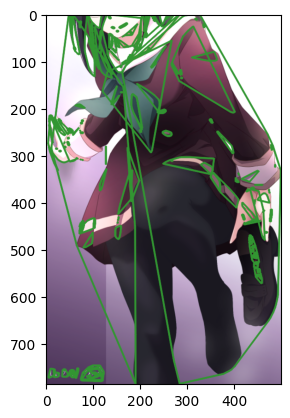

In [12]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))